In [ ]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


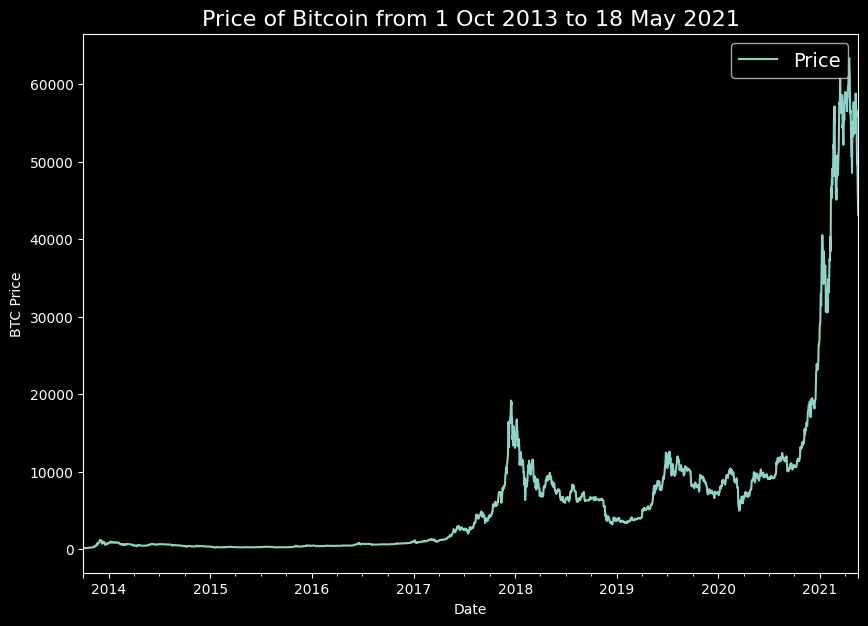

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)
plt.show()

#Create train and test sets for time series (the wrong way)

In [ ]:

timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

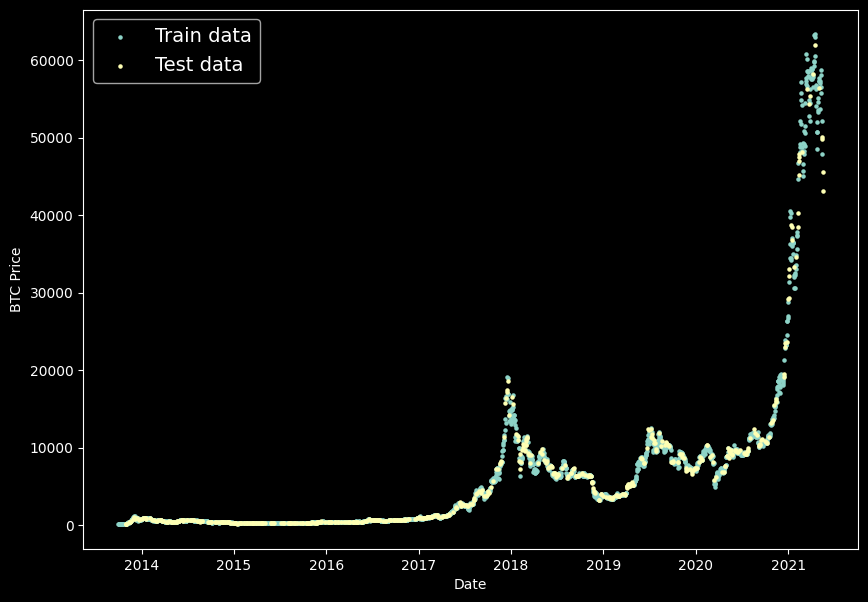

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

In [ ]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

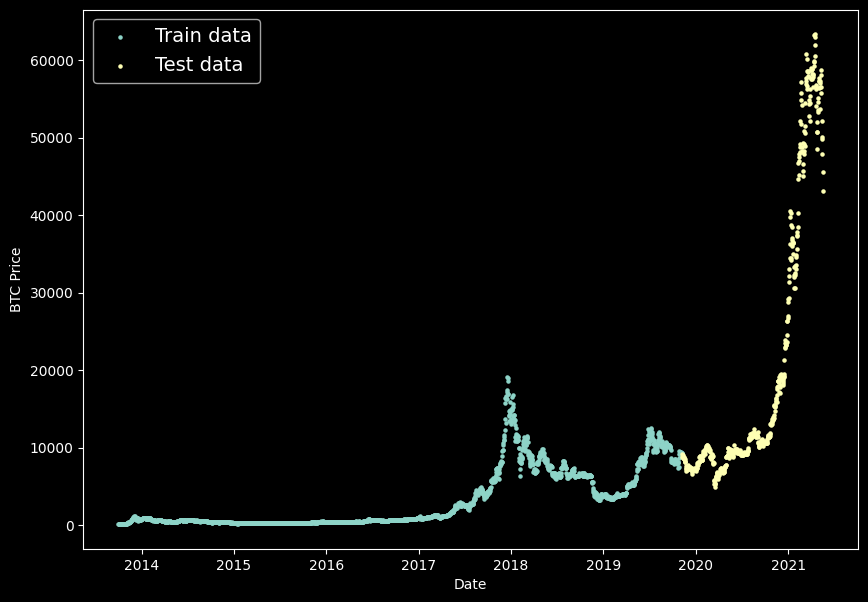

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

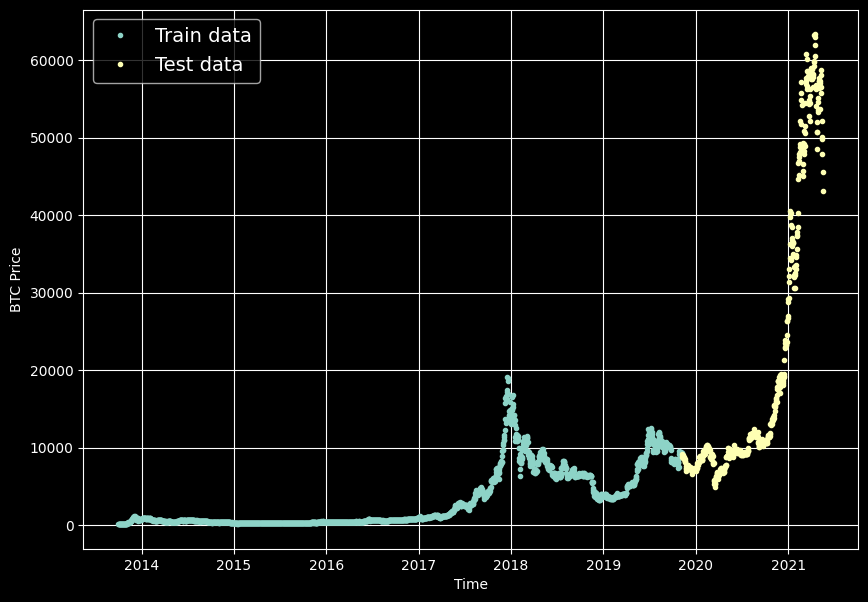

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Model 0: Naive forecast (baseline)

Formula: $$\hat{y}_{t} = y_{t-1}$$

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

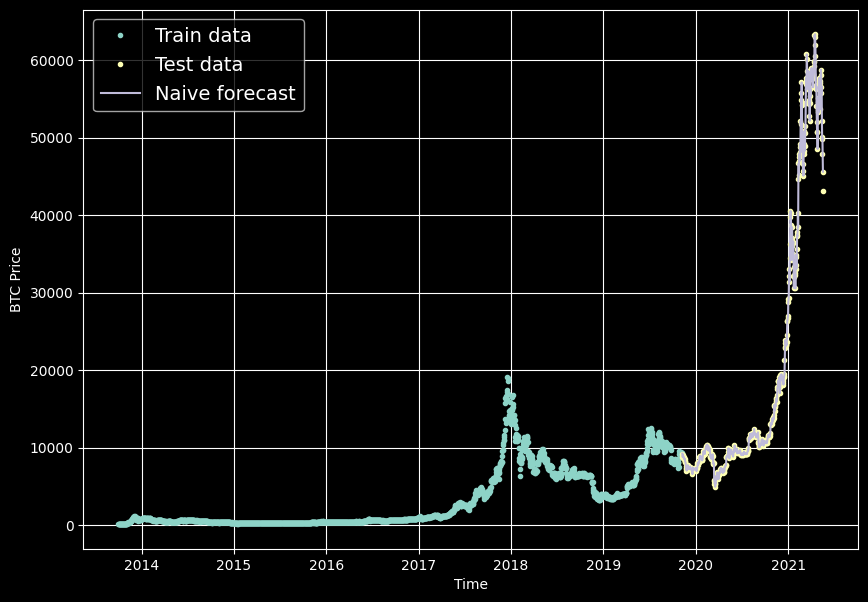

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

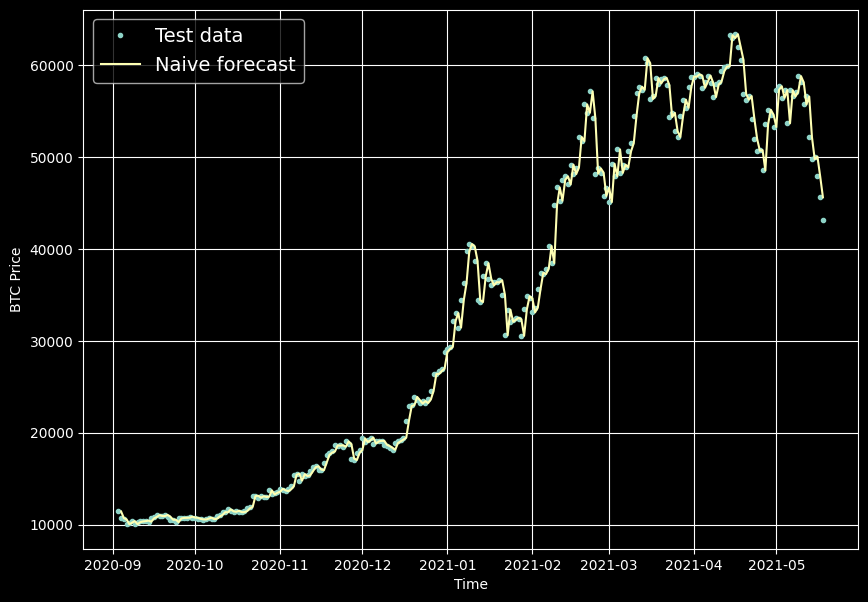

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
tf.reduce_mean(y_test).numpy()

20056.632963737226

#Windowing dataset:

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
import numpy as np

In [ ]:
def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
len(prices)

2787

In [ ]:
# window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
# window_indexes = window_step + np.expand_dims(np.arange(len(prices)-(window_size+horizon-1)), axis=0).T

NameError: name 'window_size' is not defined

In [ ]:
 np.expand_dims(np.arange(len(prices)-(window_size+horizon-1)), axis=0).T

In [ ]:
window_step

In [ ]:
window_indexes

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
# import tensorflow as tf
# !pip install keras==2.12
# from tensorflow.keras import layers

In [ ]:
import os

# Create a function to implement a ModelCheckpoint call back with specific filename

def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

#Model 1: Dense Model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels))

Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 1664.5228 - mae: 1664.5228 - val_loss: 1184.7112 - val_mae: 1184.7112
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 328.2330 - mae: 328.2330 - val_loss: 1555.4486 - val_mae: 1555.4486
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 215.9676 - mae: 215.9676 - val_loss: 1008.1486 - val_mae: 1008.1486
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 179.6444 - mae: 179.6444 - val_loss: 960.1460 - val_mae: 960.1460
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 172.1949 - mae: 172.1949 - val_loss: 959.7432 - val_mae: 959.7432
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 166.3615 - mae: 166.3615 - val_loss: 927.5908 - val_mae: 927.5908
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 162.8922 - mae: 162.8922 - val_loss: 915.1313 - val_mae: 915.1313
Epoch 8/100
18/18 

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 615.9979 - mae: 615.9979


[615.9978637695312, 615.9978637695312]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8733.372, 8682.01 , 8917.238, 8652.859, 8657.899, 8635.746,
        8542.959, 8433.35 , 8355.504, 8416.828], dtype=float32)>)

In [ ]:
print(model_1_preds.shape)
print(test_labels.shape)


(556,)
(556, 1)


In [ ]:
y_true=tf.squeeze(test_label)
y_true

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 615.998,
 'mse': 1251411.0,
 'rmse': 1118.6648,
 'mape': 2.8156369,
 'mase': 1.0821378}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

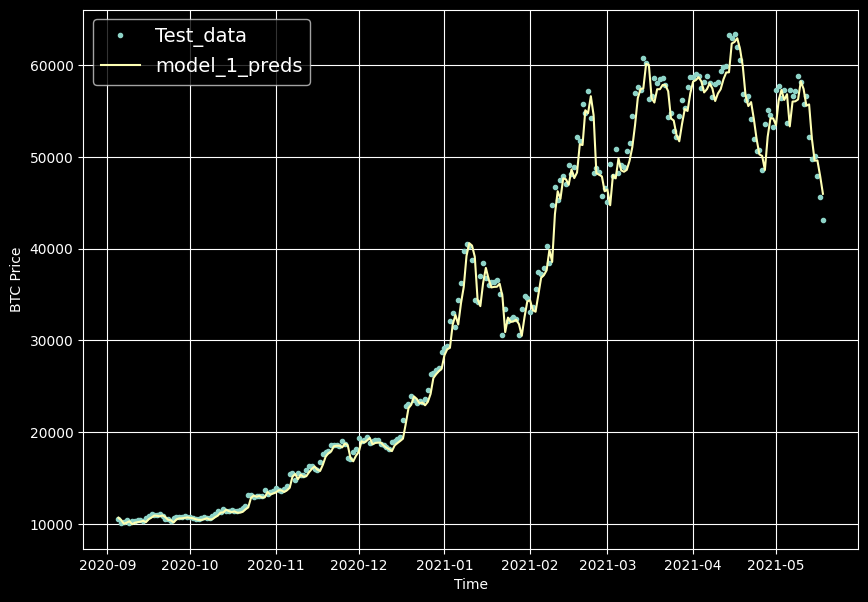

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

#Model 2:Dense model(windows_size=30,horizon=1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows1, full_labels1 = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows1), len(full_labels1)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows1, test_windows1, train_labels1, test_labels1 = make_train_test_splits(windows=full_windows1, labels=full_labels1)
len(train_windows1), len(test_windows1), len(train_labels1), len(test_labels1)

(2205, 552, 2205, 552)

In [ ]:
train_windows1[:5], train_labels1[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
np.array_equal(np.squeeze(train_labels1[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [ ]:
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
import os
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler


In [ ]:
# import datetime
# def create_tensorboard_callback(dir_name, experiment_name):
#   log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")#using the strftime method from the datetime module. This ensures that each experiment has a unique log directory.
#   tensorboard_callback = tf.keras.callbacks.TensorBoard(
#       log_dir=log_dir# log_dir is passed as an argument to specify where the log files should be saved.
#   )
#   print(f"Saving TensorBoard log files to: {log_dir}")
#   return tensorboard_callback

In [ ]:
# from tensorflow import keras
# checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
# model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows1,
            train_labels1,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows1, test_labels1),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows1, test_labels1)

18/18 [==============================] - 0s 2ms/step - loss: 657.2254


657.2254028320312

In [ ]:
model_2_preds = make_preds(model_2, test_windows1)
len(model_2_preds), model_2_preds[:10]

18/18 [==============================] - 0s 1ms/step


(552,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8927.013 , 8933.004 , 8815.426 , 8715.884 , 8570.899 , 8517.676 ,
        8383.398 , 8226.852 , 8142.9253, 7874.768 ], dtype=float32)>)

In [ ]:
print(model_2_preds.shape)
print(test_labels1.shape)

(552,)
(552, 1)


In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels1),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 657.2254,
 'mse': 1421723.6,
 'rmse': 1192.3605,
 'mape': 3.037808,
 'mase': 1.1488364}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
model_1_results

{'mae': 615.998,
 'mse': 1251411.0,
 'rmse': 1118.6648,
 'mape': 2.8156369,
 'mase': 1.0821378}

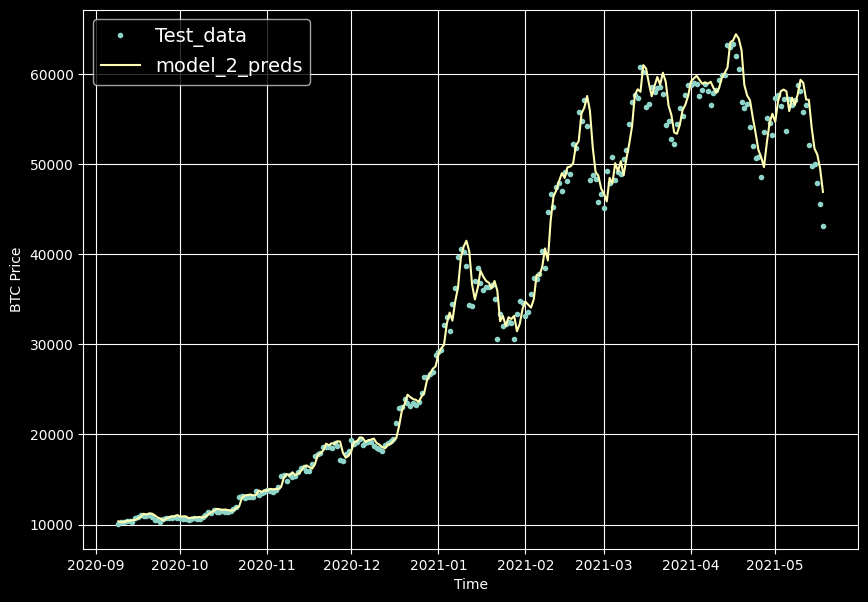

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows1):], values=test_labels1[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows1):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

#Make our evaluation function work for larger horizons

In [ ]:
def evaluate_preds_(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),}

#Model 3:Dense model(windows_size=30,horizon=7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows2, full_labels2 = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows2), len(full_labels2)

(2751, 2751)

In [ ]:
train_windows2, test_windows2, train_labels2, test_labels2 = make_train_test_splits(windows=full_windows2, labels=full_labels2, test_split=0.2)
len(train_windows2), len(test_windows2), len(train_labels2), len(test_labels2)

(2200, 551, 2200, 551)

In [ ]:
np.array_equal(np.squeeze(train_labels2[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [ ]:
train_windows2[:5], train_labels2[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows2,
            train_labels2,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows2, test_labels2),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows2, test_labels2)

18/18 [==============================] - 0s 2ms/step - loss: 1452.8224


1452.8223876953125

In [ ]:
model_3_preds = make_preds(model_3, test_windows2)
len(model_3_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(551,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8733.372, 8682.01 , 8917.238, 8652.859, 8657.899, 8635.746,
        8542.959, 8433.35 , 8355.504, 8416.828], dtype=float32)>)

In [ ]:
print(model_3_preds.shape)
print(test_labels2.shape)

(551, 7)
(551, 7)


In [ ]:
model_3_results = evaluate_preds_(y_true=tf.squeeze(test_labels2),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1452.8224, 'mse': 6391892.0, 'rmse': 1626.2614, 'mape': 6.492032}

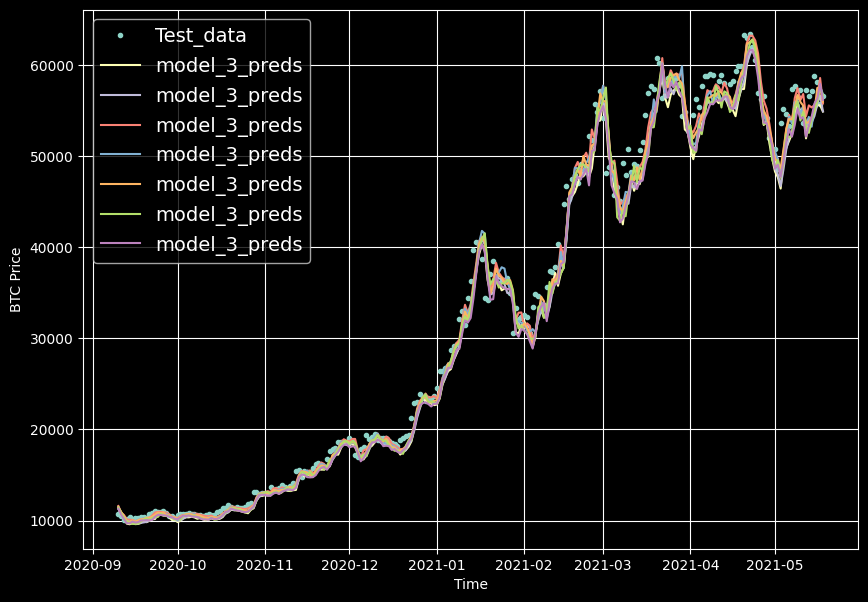

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows2):], values=test_labels2[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows2):], values=model_3_preds, start=offset, format="-", label="model_3_preds")



In [ ]:
X_test.shape

(558,)

In [ ]:
test_windows.shape

(556, 7)

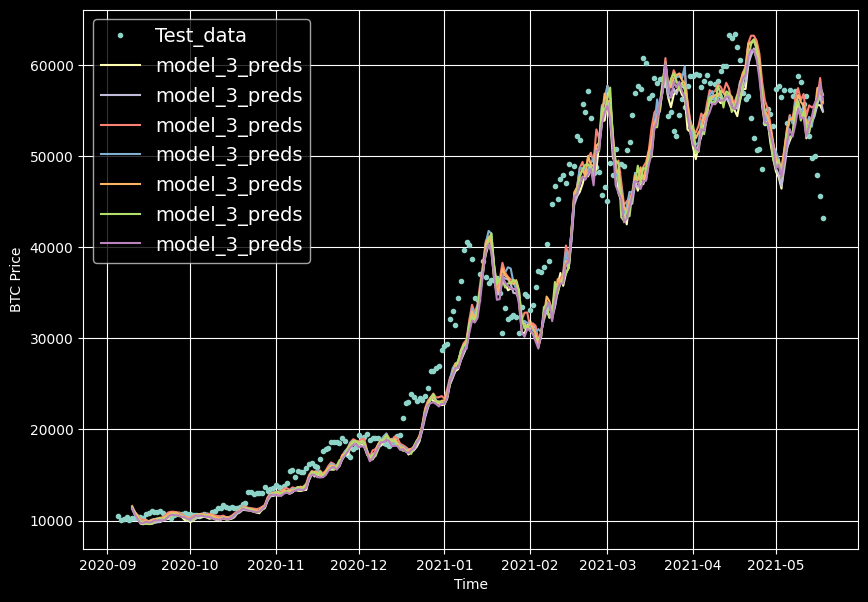

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows2):],
                 values=model_3_preds,
                 format="-",
                 start=offset,
                 label="model_3_preds")

#Comparising models

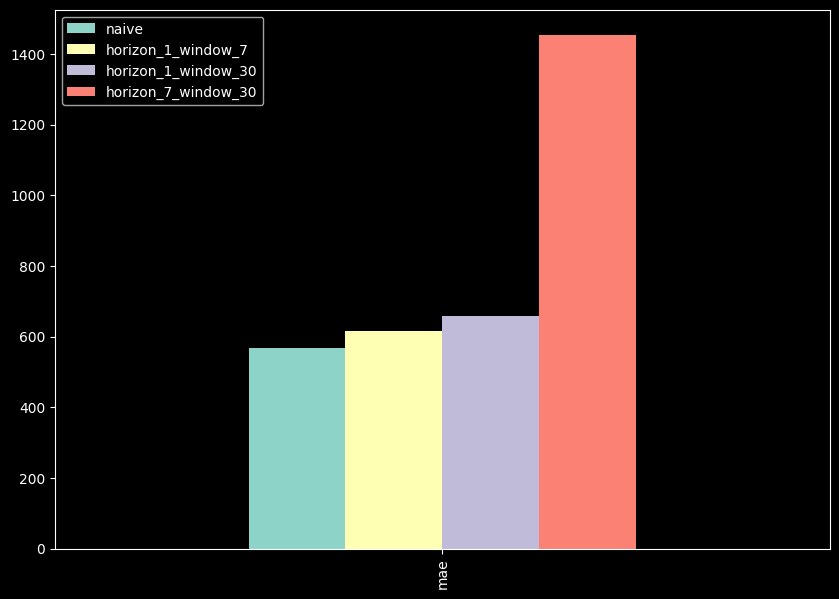

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

#Conv1D Model 4

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# expand_dims_layer = layers.Lambda(lambda train_windows: tf.expand_dims(train_windows, axis=1))
# print(f"Original shape: {train_windows.shape}")
# print(f"Expanded shape: {expand_dims_layer(train_windows).shape}")

In [ ]:
train_windows.shape

(2224, 7)

In [ ]:
train_labels.shape

(2224, 1)

In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
 model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 7)              903       
                                                                 
Total params: 5511 (21.53 KB)
Trainable params: 5511 (21.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 15719.8164


15719.81640625

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
len(model_4_preds), model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[2465.1995, 1973.9312, 1929.6903, 2077.7854, 2278.19  , 1646.3928,
         1992.4761],
        [2450.4795, 1920.6104, 1916.734 , 2088.1953, 2263.963 , 1659.7668,
         1970.5724],
        [2422.8088, 1915.0535, 1831.0187, 2082.4485, 2269.7615, 1658.9088,
         1955.088 ],
        [2405.8691, 1952.3667, 1821.8955, 2023.1215, 2257.0063, 1585.8544,
         1933.7067],
        [2389.1758, 1889.1621, 1831.8707, 2022.267 , 2228.0757, 1622.288 ,
         1914.0897],
        [2358.5857, 1880.9487, 1810.3163, 2026.5425, 2187.981 , 1616.5961,
         1905.9241],
        [2330.1619, 1863.8562, 1777.8854, 1959.3002, 2191.775 , 1572.8341,
         1892.7175],
        [2328.8164, 1853.9894, 1820.1144, 1984.787 , 2188.946 , 1578.0851,
         1860.1187],
        [2323.8386, 1846.5334, 1773.3083, 1972.8794, 2144.3267, 1570.123 ,
         1879.3337],
        [2286.637 , 1816.6752, 1751.7255, 1949.8599, 2150.7583, 1561.5935,
     

In [ ]:
print(model_4_preds.shape)
print(test_labels.shape)

(556, 7)
(556, 1)


In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results


#LSTM model

In [ ]:
WINDOW_SIZE=7
HORIZON=1

In [ ]:
tf.random.set_seed(42)

# Create model
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Exception ignored in: <function _xla_gc_callback at 0x7cb660289240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9002.162, 8895.907, 9081.463, 8864.878, 8838.904, 8834.286,
       8767.799, 8625.936, 8558.24 , 8601.283], dtype=float32)>

In [ ]:
print(model_5_preds.shape)
print(test_labels.shape)

(556,)
(556, 1)


In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 604.39105,
 'mse': 1265026.5,
 'rmse': 1124.734,
 'mape': 2.7505615,
 'mase': 1.0617477}

#Ensemble learning technique


In [ ]:
# Make features and labels
X = bitcoin_prices.dropna().drop("Price", axis=1)
y = bitcoin_prices.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)#?
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)#?

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 0), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 0), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):


  ensemble_models = []


  for i in range(num_iter):

    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")


      model = tf.keras.Sequential([
        #interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),#By initializing the weights in this way, the He normal initialization helps to ensure that the distribution of activations stays consistent throughout the network, providing a smoother and more stable training process.
                                                                             #It allows the network to learn more efficiently and can improve its performance, especially in deep neural networks.
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,

                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])


      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
# %%time
# # Get list of trained ensemble models
# ensemble_models = get_ensemble_models(num_iter=5,
#                                       num_epochs=1000)

In [ ]:
# def make_ensemble_preds(ensemble_models, data):
#   ensemble_preds = []
#   for model in ensemble_models:
#     preds = model.predict(data) # make predictions with current ensemble model
#     ensemble_preds.append(preds)
#   return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
#                                      data=test_dataset)
# ensemble_preds

In [ ]:
# ensemble_results = evaluate_preds(y_true=y_test,
#                                   y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
# ensemble_results

#Make a multivariate time series

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


In [ ]:
# Block reward values
import numpy as np
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020
# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")


In [ ]:
block_reward_3_datetime-bitcoin_prices.index[0]

Timedelta('1012 days 00:00:00')

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days

1012

In [ ]:
block_reward_4_datetime

numpy.datetime64('2020-05-11')

In [ ]:
bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
#                        [: 1012,-1]=25, [1012:2414,-1]=12,5, [2414:,-1]=6,25
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head(10)


,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25
2013-10-06,120.65533,25
2013-10-07,121.79500,25
2013-10-08,123.03300,25
2013-10-09,124.04900,25


In [ ]:
bitcoin_prices_block['block_reward'].value_counts()

block_reward
12.5    1402
25      1012
6.25     373
Name: count, dtype: int64

In [ ]:
bitcoin_prices_block.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         2787 non-null   float64
 1   block_reward  2787 non-null   object 
dtypes: float64(1), object(1)
memory usage: 65.3+ KB


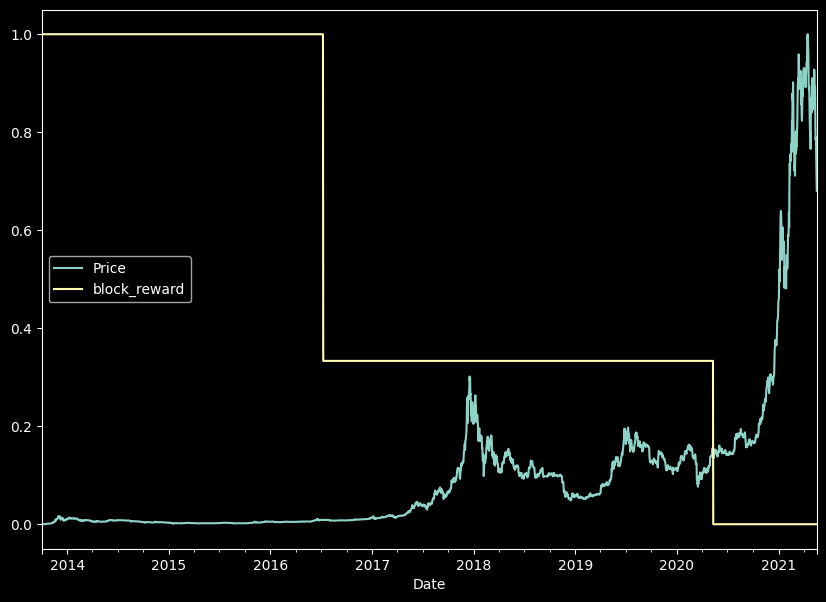

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [ ]:
WINDOW_SIZE=7
HORIZON=1
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
from collections import Counter

In [ ]:
def detect_outliers(df, features):
  outlier_indices = []

  for f in features:
    Q1 = np.percentile(df[f], 25)
    Q3 = np.percentile(df[f], 75)
    IQR = Q3 - Q1

    outlier_step = IQR * 1.5
    outlier_list_column = df[(df[f] < Q1 - outlier_step) | (df[f] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_column)

  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 3)

  return multiple_outliers

In [ ]:
bitcoin_prices_windowed.loc[detect_outliers(bitcoin_prices_windowed, ['Price+1', 'Price+2', 'Price+3', 'Price+4','Price+5','Price+6','Price+7'])]

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,


In [ ]:
bitcoin_prices_windowed = bitcoin_prices_windowed.drop(detect_outliers(bitcoin_prices_windowed,['Price+1', 'Price+2', 'Price+3', 'Price+4','Price+5','Price+6','Price+7']),
                         axis = 0).reset_index(drop = True)

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
0,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
3,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
4,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
7,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
8,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
9,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
10,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
11,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

7     123.032997
8     124.049004
9     125.961159
10    125.279663
11    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

#Model 6: Dense (multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 577.3230


577.322998046875

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8842.123, 8743.426, 9052.854, 8761.364, 8680.727, 8768.254,
       8688.643, 8468.549, 8466.541, 8525.485], dtype=float32)>

In [ ]:
print(model_6_preds.shape)
print(y_test.shape)

(556,)
(556,)


In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 577.32294,
 'mse': 1182913.6,
 'rmse': 1087.6183,
 'mape': 2.5977254,
 'mase': 1.0141965}

#Feature importance by RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

model score on training data: 0.9992511539904323
model score on testing data: 0.14908420029777336


In [ ]:
importances = model.feature_importances_
importances

array([5.63438297e-07, 9.46887498e-01, 2.43337633e-02, 1.77151476e-02,
       4.18941476e-03, 3.12377989e-03, 1.22569764e-03, 2.52413567e-03])

In [ ]:
indices = np.argsort(importances)
indices

array([0, 6, 7, 5, 4, 3, 2, 1])

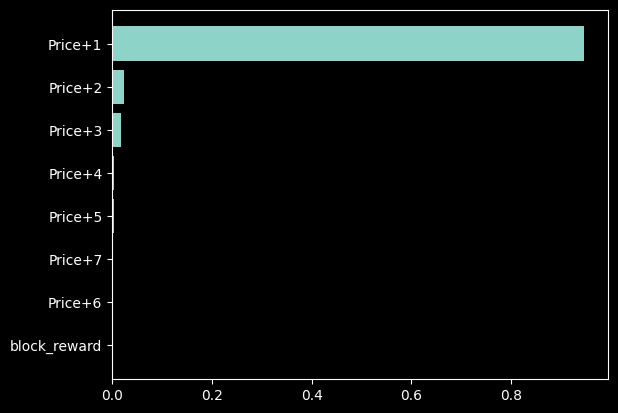

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

#Feature importance by permutation

In [ ]:
# Any model could be used here

model = RandomForestRegressor()
# model = make_pipeline(StandardScaler(),
#                       RidgeCV())

In [ ]:
model.fit(X_train, y_train)


print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

model score on training data: 0.9991932080967343
model score on testing data: 0.14372073108540762


##Feature importance

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
7,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
8,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
9,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
10,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
11,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
col_idx = list(X.columns).index('Price+2')
col_idx

2

In [ ]:
X.iloc[:, col_idx]

7         120.655327
8         121.794998
9         123.032997
10        124.049004
11        125.961159
            ...     
2782    56573.554688
2783    52147.820312
2784    49764.132812
2785    50032.691406
2786    47885.625000
Name: Price+2, Length: 2780, dtype: float32

In [ ]:
permuted_score = model.score(X, y)
permuted_score

0.556701240306355

In [ ]:
arr = np.array([1, 2, 3, 4, 5,0])
np.random.permutation(arr)

array([3, 4, 5, 2, 1, 0])

In [ ]:
np.random.permutation(7)

array([6, 3, 4, 2, 5, 1, 0])

In [ ]:
ydef get_score_after_permutation(model, X, y, curr_feat):
    """return the score of model when curr_feat is permuted"""

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values
    )

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """compare the score when curr_feat is permuted"""

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance


curr_feat = "Price+1"

feature_importance = get_feature_importance(model, X_train, y_train, curr_feat)
print(
    f'feature importance of "{curr_feat}" on train set is '
    f"{feature_importance:.3}"
)

In [ ]:
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat)
            )

        importances.append(list_feature_importance)

    return {
        "importances_mean": np.mean(importances, axis=1),
        "importances_std": np.std(importances, axis=1),
        "importances": importances,
    }


# This function could directly be access from sklearn
# from sklearn.inspection import permutation_importance

In [ ]:
def plot_feature_importances(perm_importance_result, feat_name):
    """bar plot the feature importance"""

    fig, ax = plt.subplots()

    indices = perm_importance_result["importances_mean"].argsort()
    plt.barh(
        range(len(indices)),
        perm_importance_result["importances_mean"][indices],
        xerr=perm_importance_result["importances_std"][indices],
    )

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

In [ ]:
perm_importance_result_train = permutation_importance(
    model, X_train, y_train, n_repeats=10
)

plot_feature_importances(perm_importance_result_train, X_train.columns)

#Create model using feature importance

In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward', 'Price+4', 'Price+5', 'Price+6', 'Price+7'], axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

In [ ]:
y.head()

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train_featured, y_train = X[:split_size], y[:split_size]
X_test_featured, y_test = X[split_size:], y[split_size:]
len(X_train_featured), len(y_train), len(X_test_featured), len(y_test)

In [ ]:
y_test.shape

In [ ]:
# import numpy as np

# y_test_expanded = np.expand_dims(y_test, axis=1)
# print(y_test_expanded.shape)


##Model7

In [ ]:
#CREATE MODEL
tf.random.set_seed(42)

# Make multivariate time series model
model_7 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_7_dense_multivariate")

# Compile
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_7.fit(X_train_featured, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test_featured, y_test),
            callbacks=[create_model_checkpoint(model_name=model_7.name)])

In [ ]:
# Make sure best model is loaded and evaluate
model_7 = tf.keras.models.load_model("model_experiments/model_7_dense_multivariate")
model_7.evaluate(X_test_featured, y_test_expanded)

In [ ]:
# Make predictions on multivariate data
model_7_preds = tf.squeeze(model_7.predict(X_test_featured))
model_7_preds[:10]

In [ ]:
print(model_7_preds.shape)
print(y_test.shape)

In [ ]:
 # Evaluate preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

In [ ]:
model_6_results